In [36]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import silhouette_score

import train_models
import model_

## Train a context aware model 

Use probabilities from classifier, LDA topics and metadata / context data. Goal is to build an interpretable model.

In [20]:
df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_df_v3.csv")

print(df.columns)

Index(['Tweet Text', 'Tweet Datetime', 'Tweet Id', 'User Id', 'User Name',
       'User Location', 'Tweet Coordinates', 'Place Info', 'Country',
       'Hashtags', 'Retweets', 'Favorites', 'Language', 'Source',
       'Replied Tweet Id', 'Replied Tweet User Id', 'month', 'ground_truth',
       'ID', 'folds', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound'],
      dtype='object')


In [21]:
context_features = ['Retweets', 'Favorites', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']

model_type = "XGB"
res_df = train_models.train_n_cv_valid_models(df, context_features, model_type)

[4, 2, 1, 3]
(12008, 24)
Results obtained on fold: 4
                     0            1  accuracy    macro avg  weighted avg
precision     0.653377     0.731518    0.6835     0.692447      0.692056
recall        0.795050     0.569697    0.6835     0.682373      0.683500
f1-score      0.717285     0.640545    0.6835     0.678915      0.679299
support    2020.000000  1980.000000    0.6835  4000.000000   4000.000000
(12001, 24)
Results obtained on fold: 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.654627     0.781594  0.703519     0.718110      0.719806
recall        0.827179     0.586291  0.703519     0.706735      0.703519
f1-score      0.730856     0.670000  0.703519     0.700428      0.699616
support    1950.000000  2057.000000  0.703519  4007.000000   4007.000000
(12005, 24)
Results obtained on fold: 1
                     0            1  accuracy    macro avg  weighted avg
precision     0.671252     0.701427  0.684986     0.686339      

In [22]:
res_df

0

## Train model on BERT Features 

In [24]:
df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_df_v3.csv")

print(df.columns)


BERT_df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_BERT_df_v4.csv")
print(BERT_df.shape)

Index(['Tweet Text', 'Tweet Datetime', 'Tweet Id', 'User Id', 'User Name',
       'User Location', 'Tweet Coordinates', 'Place Info', 'Country',
       'Hashtags', 'Retweets', 'Favorites', 'Language', 'Source',
       'Replied Tweet Id', 'Replied Tweet User Id', 'month', 'ground_truth',
       'ID', 'folds', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound'],
      dtype='object')
(3201, 769)


In [26]:
merged_df = pd.merge(df[["ground_truth", "folds", "ID"]], BERT_df, on=["ID"], sort=True)

In [27]:
print(merged_df.shape)

BERT_features = BERT_df.columns.tolist()[:-1]

model_type = "XGB"
res_df = train_models.train_n_cv_valid_models(merged_df, BERT_features, model_type)

(3201, 771)
[2, 3, 1, 4]
(2400, 771)
Results obtained on fold: 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.954545    0.979112  0.966292    0.966829      0.966630
recall       0.980344    0.951777  0.966292    0.966060      0.966292
f1-score     0.967273    0.965251  0.966292    0.966262      0.966278
support    407.000000  394.000000  0.966292  801.000000    801.000000
(2401, 771)
Results obtained on fold: 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.963855    0.981818    0.9725    0.972837      0.972680
recall       0.982801    0.961832    0.9725    0.972317      0.972500
f1-score     0.973236    0.971722    0.9725    0.972479      0.972492
support    407.000000  393.000000    0.9725  800.000000    800.000000
(2401, 771)
Results obtained on fold: 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.978261    0.979275   0.97875    0.978768      0.978751
recall       0.

## Train model on TF-IDF features 

In [ ]:
df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_df_v3.csv")

print(df.columns)


TF_IDF_df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_TF_IDF_df_v4.csv")
print(TF_IDF_df.shape)

In [ ]:
merged_df = pd.merge(df[["ground_truth", "folds", "ID"]], TF_IDF_df, on=["ID"], sort=True)

In [ ]:
print(merged_df.shape)

TF_IDF_features = TF_IDF_df.columns.tolist()[:-1]

model_type = "XGB"
res_df = train_models.train_n_cv_valid_models(merged_df, TF_IDF_features, model_type)

## K-means model 

In [25]:
df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_df_v3.csv")

n_comps_LDA_df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_LDA10_df_v4.csv")

print(df.columns)
print(n_comps_LDA_df.columns)

Index(['Tweet Text', 'Tweet Datetime', 'Tweet Id', 'User Id', 'User Name',
       'User Location', 'Tweet Coordinates', 'Place Info', 'Country',
       'Hashtags', 'Retweets', 'Favorites', 'Language', 'Source',
       'Replied Tweet Id', 'Replied Tweet User Id', 'month', 'ground_truth',
       'ID', 'folds', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound'],
      dtype='object')
Index(['LDA_comp_1', 'LDA_comp_2', 'LDA_comp_3', 'LDA_comp_4', 'LDA_comp_5',
       'LDA_comp_6', 'LDA_comp_7', 'LDA_comp_8', 'LDA_comp_9', 'LDA_comp_10',
       'ID'],
      dtype='object')


In [26]:
merged_df = pd.merge(df, n_comps_LDA_df, on=["ID"], sort=True)

In [39]:
context_n_LDA_features = ['Retweets', 'Favorites', 'vader_neg', 'vader_neu', 
                          'vader_pos', 'vader_compound'] + n_comps_LDA_df.columns.tolist()[:-1]

print(context_n_LDA_features)


n_clusters = [2, 3, 4, 5, 7, 10]
n_clusters = list(range(2, 30, 1))

best_nc = None 
best_nc_score = 0 
best_nc_labels = None 
for nc in n_clusters:
#     print("Number of clusters:", nc)
    k_means_model = model_.kmeans_clustering(merged_df[context_n_LDA_features], nc)
    
    labels = k_means_model.predict(merged_df[context_n_LDA_features])
    
    score = silhouette_score(merged_df[context_n_LDA_features], labels)
#     print("Silhouette score:", score)
    
    if score > best_nc_score:
        best_nc = nc 
        best_nc_score = score 
        best_nc_labels = labels
        
    print(f'Number of clusters: {best_nc} with best score {best_nc_score}')
        

['Retweets', 'Favorites', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'LDA_comp_1', 'LDA_comp_2', 'LDA_comp_3', 'LDA_comp_4', 'LDA_comp_5', 'LDA_comp_6', 'LDA_comp_7', 'LDA_comp_8', 'LDA_comp_9', 'LDA_comp_10']
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best score 0.9524164984239143
Number of clusters: 2 with best sco

In [37]:
np.sum(best_nc_labels)

85

In [12]:
labels = k_means_model.predict(merged_df[context_n_LDA_features])

In [13]:
labels.shape

(3201,)

## t-SNE, UMAP and other visualization 

In [17]:
df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_df_v3.csv")

n_comps_LDA_df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_LDA10_df_v4.csv")

print(df.columns)
print(n_comps_LDA_df.columns)

Index(['Tweet Text', 'Tweet Datetime', 'Tweet Id', 'User Id', 'User Name',
       'User Location', 'Tweet Coordinates', 'Place Info', 'Country',
       'Hashtags', 'Retweets', 'Favorites', 'Language', 'Source',
       'Replied Tweet Id', 'Replied Tweet User Id', 'month', 'ground_truth',
       'ID', 'folds', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound'],
      dtype='object')
Index(['LDA_comp_1', 'LDA_comp_2', 'LDA_comp_3', 'LDA_comp_4', 'LDA_comp_5',
       'LDA_comp_6', 'LDA_comp_7', 'LDA_comp_8', 'LDA_comp_9', 'LDA_comp_10',
       'ID'],
      dtype='object')


In [18]:
merged_df = pd.merge(df, n_comps_LDA_df, on=["ID"], sort=True)

['Retweets', 'Favorites', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']

Number of neighbors: 10, minimum distance: 0.1


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


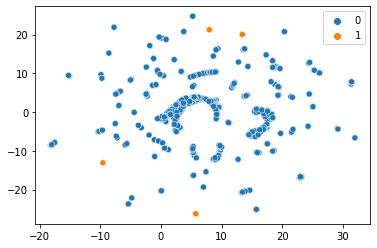


Number of neighbors: 10, minimum distance: 0.3


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


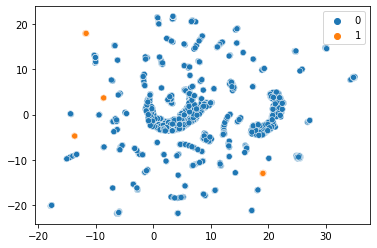


Number of neighbors: 10, minimum distance: 0.5


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


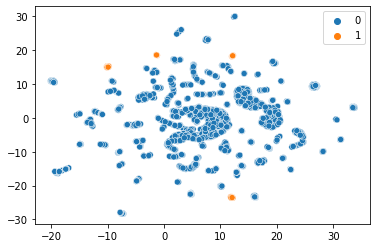


Number of neighbors: 10, minimum distance: 0.7


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


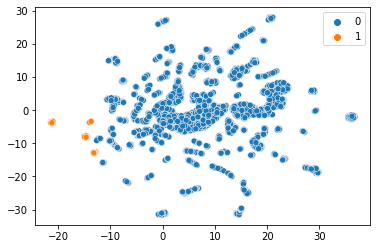


Number of neighbors: 10, minimum distance: 0.8


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


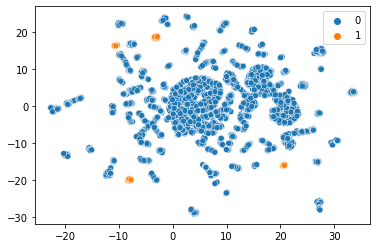


Number of neighbors: 10, minimum distance: 0.95


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


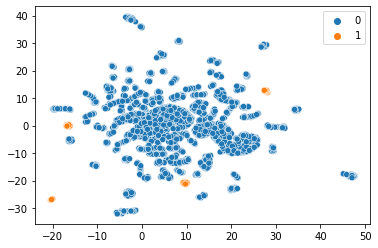


Number of neighbors: 40, minimum distance: 0.1


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


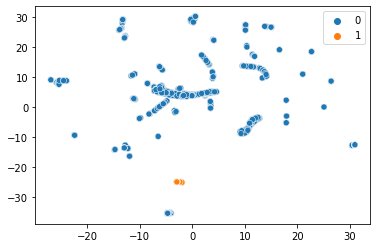


Number of neighbors: 40, minimum distance: 0.3


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


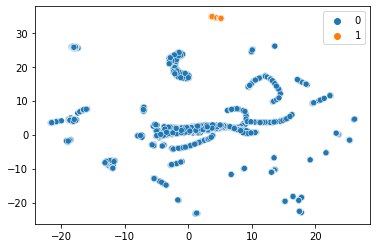


Number of neighbors: 40, minimum distance: 0.5


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


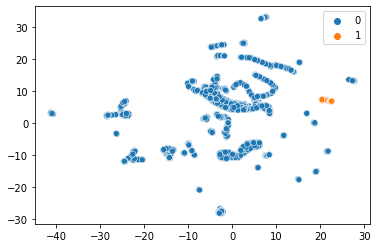


Number of neighbors: 40, minimum distance: 0.7


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


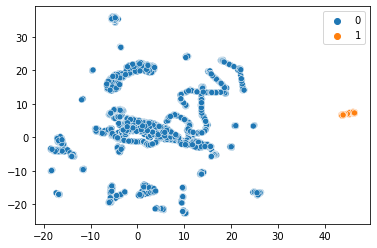


Number of neighbors: 40, minimum distance: 0.8


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


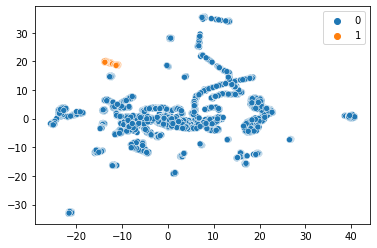


Number of neighbors: 40, minimum distance: 0.95


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


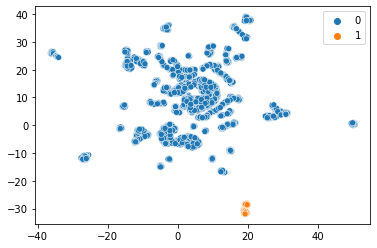


Number of neighbors: 70, minimum distance: 0.1


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


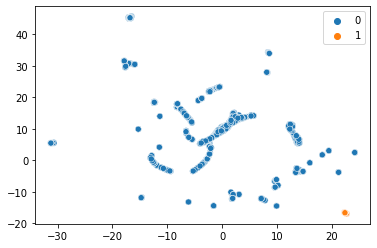


Number of neighbors: 70, minimum distance: 0.3


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


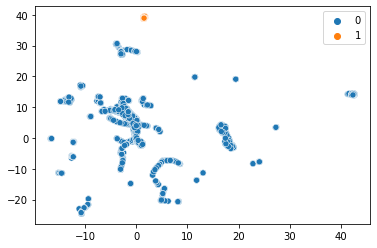


Number of neighbors: 70, minimum distance: 0.5


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


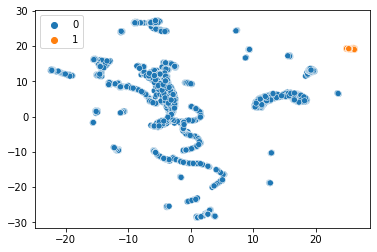


Number of neighbors: 70, minimum distance: 0.7


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


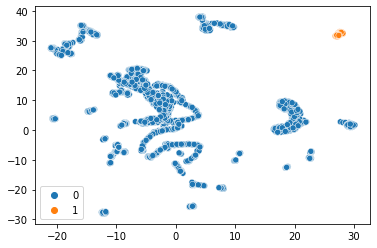


Number of neighbors: 70, minimum distance: 0.8


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


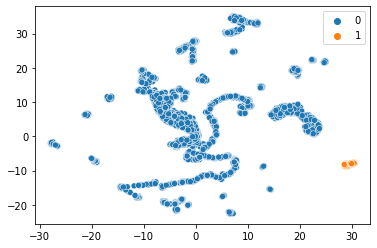


Number of neighbors: 70, minimum distance: 0.95


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


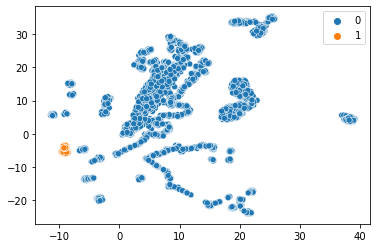


Number of neighbors: 100, minimum distance: 0.1


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


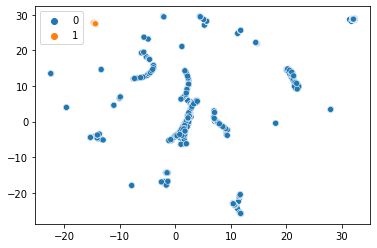


Number of neighbors: 100, minimum distance: 0.3


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


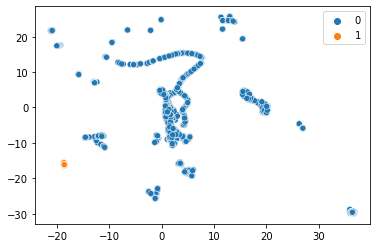


Number of neighbors: 100, minimum distance: 0.5


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


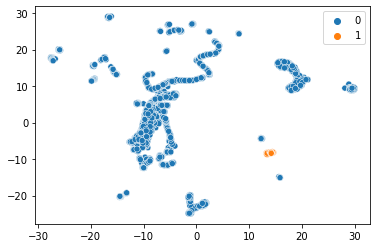


Number of neighbors: 100, minimum distance: 0.7


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


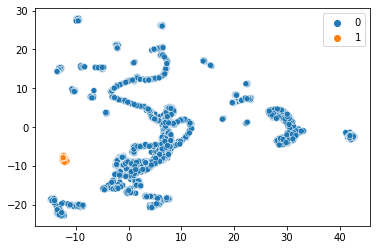


Number of neighbors: 100, minimum distance: 0.8


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


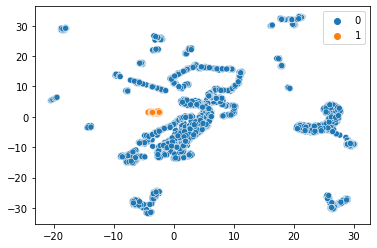


Number of neighbors: 100, minimum distance: 0.95


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


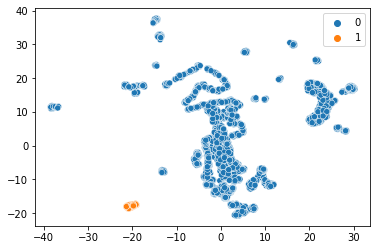


Number of neighbors: 130, minimum distance: 0.1


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


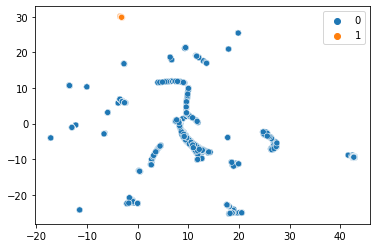


Number of neighbors: 130, minimum distance: 0.3


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


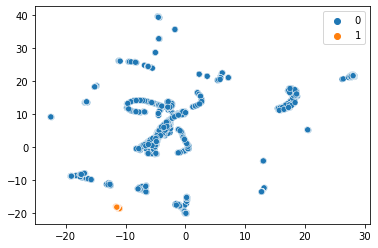


Number of neighbors: 130, minimum distance: 0.5


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


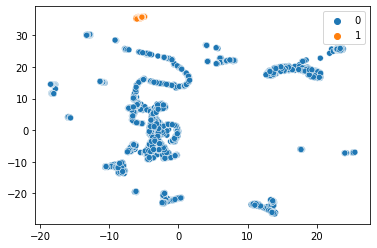


Number of neighbors: 130, minimum distance: 0.7


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


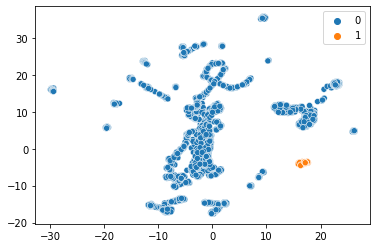


Number of neighbors: 130, minimum distance: 0.8


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


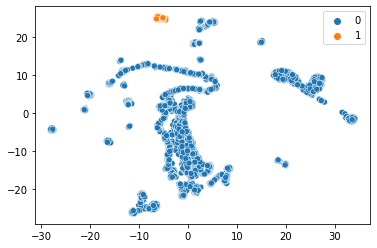


Number of neighbors: 130, minimum distance: 0.95


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


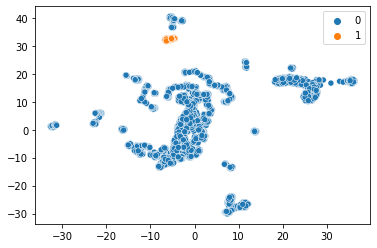


Number of neighbors: 160, minimum distance: 0.1


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


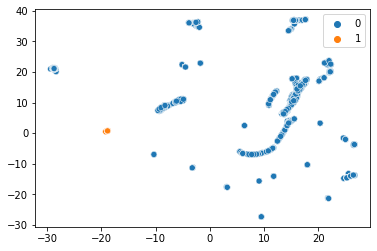


Number of neighbors: 160, minimum distance: 0.3


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


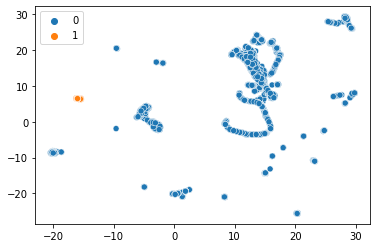


Number of neighbors: 160, minimum distance: 0.5


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


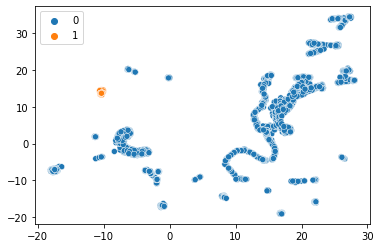


Number of neighbors: 160, minimum distance: 0.7


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


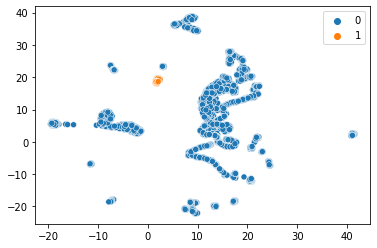


Number of neighbors: 160, minimum distance: 0.8


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


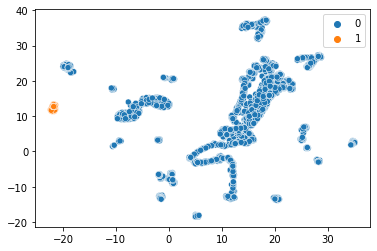


Number of neighbors: 160, minimum distance: 0.95


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


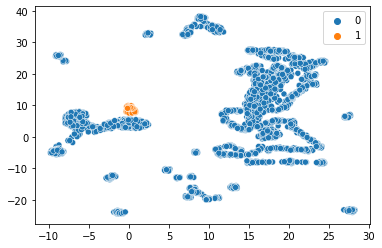


Number of neighbors: 190, minimum distance: 0.1


/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


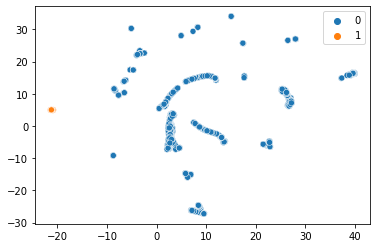


Number of neighbors: 190, minimum distance: 0.3


In [ ]:
context_n_LDA_features = ['Retweets', 'Favorites', 'vader_neg', 'vader_neu', 
                          'vader_pos', 'vader_compound'] # + n_comps_LDA_df.columns.tolist()[:-1]

print(context_n_LDA_features)

# n_neigh = 200
# min_dist = 0.99
n_neighs = list(range(10, 200, 30))
min_dists = [0.1, 0.3, 0.5, 0.7, 0.8, 0.95]

# for i in range(len(n_neighs)):
#     for j in range(len(min_dists)):
#         n_comps_UMAP = model_.umap_(merged_df[context_n_LDA_features], n_neighs[i], min_dists[j])
        
#         plt.clf()
#         sns.scatterplot(n_comps_UMAP[:, 0], n_comps_UMAP[:, 1], hue=merged_df["ground_truth"])
#         plt.show()
        
for n_neigh in n_neighs:
    for m_dist in min_dists:
        print("\n" + "=" * 100)
        print(f'Number of neighbors: {n_neigh}, minimum distance: {m_dist}')
        n_comps_UMAP = model_.umap_(merged_df[context_n_LDA_features], n_neigh, m_dist)
        
        plt.clf()
        sns.scatterplot(n_comps_UMAP[:, 0], n_comps_UMAP[:, 1], hue=best_nc_labels)
        plt.show()
        

In [15]:
merged_df[merged_df["ground_truth"] == 0].shape

(1630, 34)

/home/cse/anaconda3/envs/socialMM/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

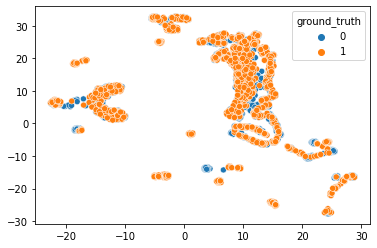

In [16]:
sns.scatterplot(n_comps_UMAP[:, 0], n_comps_UMAP[:, 1], hue=merged_df["ground_truth"])

## LDA  for topic modeling

In [ ]:
df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_df_v3.csv")

print(df.columns)


TF_IDF_df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_TF_IDF_df_v4.csv")
print(TF_IDF_df.shape)

In [ ]:
merged_df = pd.merge(df[["folds", "ID"]], TF_IDF_df, on=["ID"], sort=True)

In [ ]:
print(merged_df.shape)

TF_IDF_features = TF_IDF_df.columns.tolist()[:-1]

model_type = "LDA"


res_df = train_models.train_n_cv_valid_LDA(merged_df, TF_IDF_features, model_type)

In [ ]:
n_comps_LDA_df = pd.DataFrame(res_df)

In [ ]:
n_comps_LDA_df.to_csv("../data/stack_files/balanced_pro_n_anti_mask_LDA10_df_v4.csv", index=False, header=True)

In [ ]:
n_comps_LDA_df.tail()

## Context model with LDA 

In [ ]:
df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_df_v3.csv")

n_comps_LDA_df = pd.read_csv("../data/stack_files/balanced_pro_n_anti_mask_LDA10_df_v4.csv")

print(df.columns)
print(n_comps_LDA_df.columns)

In [ ]:
merged_df = pd.merge(df, n_comps_LDA_df, on=["ID"], sort=True)

In [ ]:
context_n_LDA_features = ['Retweets', 'Favorites', 'vader_neg', 'vader_neu', 
                          'vader_pos', 'vader_compound'] + n_comps_LDA_df.columns.tolist()[:-1]

print(context_n_LDA_features)

model_type = "XGB"
res_df = train_models.train_n_cv_valid_models(merged_df, context_n_LDA_features, model_type)

In [ ]:
n_comps_LDA_df.columns.tolist()[:-1]